# Paper Figures

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_theme()
sns.set_context("paper", rc={
    # 'font.size': 11,
    # "axes.labelsize": 12,
    'text.usetex': True,
    "font.family" : "serif",
    # "font.serif" : ["Times New Roman"],
    'text.latex.preamble': r'\usepackage{times}'
})

plt.rcParams.update({
    'font.size': 12,
    "axes.titlesize":12,
    "axes.labelsize": 12,
    'text.usetex': True,
    "font.family" : "serif",
    # "font.serif" : ["Times New Roman"],
    'text.latex.preamble': r'\usepackage{times}'
    # 'text.latex.preamble': r'\usepackage{amsfonts}; \usepackage{times}'
})

## Kernel Approximation

In [3]:
D_df = pd.read_csv('../kernel/D.csv')
R_df = pd.read_csv('../kernel/R.csv')

Rs_plot = R_df.drop(R_df[R_df["method"] == "srf"].index).reset_index(drop=True)
Rs_plot["R"] = Rs_plot["R"] / 1000
Ds_plot = D_df.drop(D_df[D_df["method"] == "srf"].index).reset_index(drop=True)

ka_names = {
    "mc": "MC",
    "qmc": "QMC",
    "orf": "ORF",
    "nys": "NYS",
    "msrf": "SVGD"
}

Rs_plot["method"] = Rs_plot["method"].map(ka_names)
Ds_plot["method"] = Ds_plot["method"].map(ka_names)


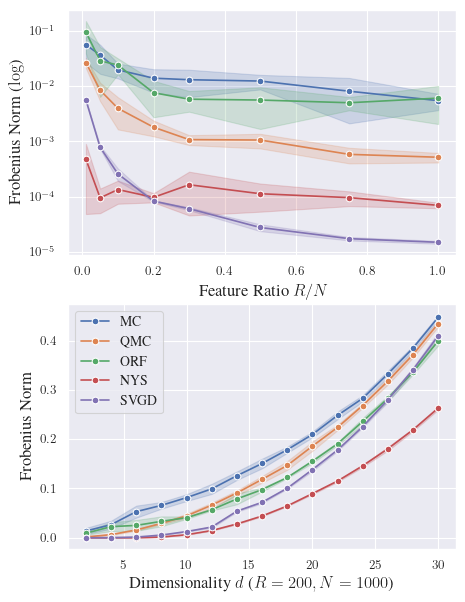

In [4]:
fig, ax = plt.subplots(2, 1, figsize=(5, 7))

sns.lineplot(data=Rs_plot, x="R", y="error", hue="method", errorbar="sd", marker="o", ax=ax[0])
ax[0].set(yscale="log", xlabel="Feature Ratio $R / N$", ylabel="Frobenius Norm ($\log$)")
ax[0].legend(loc='upper right', fontsize=9).remove()

sns.lineplot(data=Ds_plot, x="d", y="error", hue="method", errorbar="sd", marker="o", ax=ax[1])
ax[1].set(xlabel="Dimensionality $d$ ($R = 200, N=1000$)", ylabel="Frobenius Norm")
ax[1].legend(loc='upper left', fontsize=10)

fig.savefig("kernel.pdf", format="pdf", bbox_inches="tight")


## UCI Table

In [5]:
wine = pd.read_csv('../wine/results10.csv')
wine['dataset'] = 'wine'
concrete = pd.read_csv('../concrete/results.csv')
concrete['dataset'] = 'concrete'
airfoil = pd.read_csv('../airfoil/results.csv')
airfoil['dataset'] = 'airfoil'
energy = pd.read_csv('../energy/results.csv')
energy['dataset'] = 'energy'

In [27]:
results = pd.concat([wine, concrete, airfoil, energy])
results["rmse"] = np.sqrt(results["mse"])

# Define the desired order of the models
model_order = ['svgp', 'rff_rbf', 'rff', 'qrff', 'srf', 'mix']

# Convert the "model" column to a Categorical data type with the desired order
results['model'] = pd.Categorical(results['model'], categories=model_order, ordered=True)

names = {
    "rff": "SSGP",
    "rff_rbf": "SSGP-RBF",
    "svgp": "SVGP",
    "srf": "SSGP-SVGD",
    "qrff": "SSGP-$R^*$",
    "mix": "M-SRFR (Ours)" 
}

# results["model"] = results["model"].apply(lambda x: names[x])

In [28]:
res_means = results.pivot_table(index='model', columns='dataset', values='rmse', aggfunc='mean')
res_std = results.pivot_table(index='model', columns='dataset', values='rmse', aggfunc='std')
rmse_cols = [res_means[col].apply(
    lambda x: f"{x:.2f}") + " $\pm$ " + res_std[col].apply(lambda x: f"{x:.2f}"
) for col in res_means.columns]
rmse_df = pd.DataFrame([res_means.index, *rmse_cols]).T
rmse_df.columns = ["model", "airfoil", "concrete", "energy", "wine"]
rmse_df["model"] = rmse_df["model"].apply(lambda x: names[x])

/tmp/ipykernel_3963/2598861113.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  res_means = results.pivot_table(index='model', columns='dataset', values='rmse', aggfunc='mean')
/tmp/ipykernel_3963/2598861113.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  res_std = results.pivot_table(index='model', columns='dataset', values='rmse', aggfunc='std')


In [29]:
cal_means = results.pivot_table(index='model', columns='dataset', values='cal', aggfunc='mean')
cal_std = results.pivot_table(index='model', columns='dataset', values='cal', aggfunc='std')
cal_cols = [cal_means[col].apply(
    lambda x: f"{x:.2f}") + " $\pm$ " + cal_std[col].apply(lambda x: f"{x:.2f}"
) for col in cal_means.columns]
cal_df = pd.DataFrame([cal_means.index, *cal_cols]).T
cal_df.columns = ["model", "airfoil", "concrete", "energy", "wine"]
cal_df["model"] = cal_df["model"].apply(lambda x: names[x])

/tmp/ipykernel_3963/3148118923.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  cal_means = results.pivot_table(index='model', columns='dataset', values='cal', aggfunc='mean')
/tmp/ipykernel_3963/3148118923.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  cal_std = results.pivot_table(index='model', columns='dataset', values='cal', aggfunc='std')


In [26]:
print(rmse_df.to_latex())


\begin{tabular}{llllll}
\toprule
 & model & airfoil & concrete & energy & wine \\
\midrule
0 & SVGP & 2.34 $\pm$ 0.22 & 6.60 $\pm$ 0.45 & 2.70 $\pm$ 0.21 & 0.64 $\pm$ 0.05 \\
1 & SSGP-RBF & 2.90 $\pm$ 0.76 & 6.09 $\pm$ 0.52 & 0.48 $\pm$ 0.03 & 0.81 $\pm$ 0.05 \\
2 & SSGP & 2.43 $\pm$ 0.50 & 5.05 $\pm$ 0.58 & 0.38 $\pm$ 0.04 & 0.84 $\pm$ 0.06 \\
3 & SSGP-$R^*$ & 2.40 $\pm$ 0.37 & 4.82 $\pm$ 0.61 & 0.39 $\pm$ 0.03 & 0.70 $\pm$ 0.06 \\
4 & SSGP-SVGD & 2.48 $\pm$ 0.59 & 5.53 $\pm$ 0.54 & 0.48 $\pm$ 0.27 & 0.78 $\pm$ 0.06 \\
5 & M-SRFR & 1.59 $\pm$ 0.14 & 4.27 $\pm$ 0.47 & 0.33 $\pm$ 0.05 & 0.61 $\pm$ 0.05 \\
\bottomrule
\end{tabular}



In [30]:
print(cal_df.to_latex())

\begin{tabular}{llllll}
\toprule
 & model & airfoil & concrete & energy & wine \\
\midrule
0 & SVGP & 0.95 $\pm$ 0.02 & 0.96 $\pm$ 0.01 & 0.88 $\pm$ 0.04 & 0.94 $\pm$ 0.03 \\
1 & SSGP-RBF & 0.51 $\pm$ 0.11 & 0.93 $\pm$ 0.02 & 0.93 $\pm$ 0.02 & 0.48 $\pm$ 0.04 \\
2 & SSGP & 0.77 $\pm$ 0.10 & 0.95 $\pm$ 0.02 & 0.92 $\pm$ 0.02 & 0.58 $\pm$ 0.04 \\
3 & SSGP-$R^*$ & 0.82 $\pm$ 0.03 & 0.95 $\pm$ 0.02 & 0.91 $\pm$ 0.03 & 0.67 $\pm$ 0.05 \\
4 & SSGP-SVGD & 0.26 $\pm$ 0.10 & 0.95 $\pm$ 0.01 & 0.84 $\pm$ 0.17 & 0.13 $\pm$ 0.02 \\
5 & M-SRFR (Ours) & 0.80 $\pm$ 0.04 & 0.95 $\pm$ 0.01 & 0.84 $\pm$ 0.03 & 0.89 $\pm$ 0.03 \\
\bottomrule
\end{tabular}



## SVGD GMM Example

In [32]:
# set python to pick up local directory
from pathlib import Path
import sys
import os
path_root = str(Path(os.getcwd()).parents[0])
package_root = str(Path(os.getcwd()).parents[1])
sys.path.append(path_root)
sys.path.append(package_root)

In [33]:
import jax
import jax.numpy as jnp
from jax import vmap, jit
from tensorflow_probability.substrates.jax import distributions as tfd

In [34]:
from steinRF.stein.svgd import svgd
from steinRF.stein.targets import TFTarget, GMMTarget

In [121]:
from jax.scipy.stats import norm
import optax

def simple_vi(X, epochs, lr):
    def log_prob_single_gaussian(params):
        mean, log_std = params
        return jnp.sum(norm.logpdf(X, mean, jnp.exp(log_std)))

    # Variational objective (negative ELBO)
    def objective(params):
        return -log_prob_single_gaussian(params)

    # 3. VI Implementation
    opt = optax.adam(learning_rate=lr)
    
    @jit
    def update(params, opt_state):
        grads = jax.grad(objective)(params)
        updates, opt_state = opt.update(grads, opt_state)
        params = optax.apply_updates(params, updates)
        return params, opt_state
    
    # Optimization loop
    params = (jnp.ones(2), jnp.zeros(2))
    opt_state = opt.init(params)
    for i in range(epochs):
        params, opt_state = update(params, opt_state)

    return tfd.Normal(loc=params[0], scale=jnp.exp(params[1]))

In [181]:
KEY = jax.random.PRNGKey(2024)
bound = 5
lb, ub = -bound, bound
n_per_dim = 100
mu_loc = 2.5
sd = 0.7
sds = jnp.ones((4, 2)) * sd

# mixture model target
w = tfd.Categorical(probs=[0.25, 0.25, 0.25, 0.25])
gs_mu = jnp.array([[-mu_loc, -mu_loc], [mu_loc, mu_loc], [mu_loc, -mu_loc], [-mu_loc, mu_loc]])
gs = tfd.MultivariateNormalDiag(loc=gs_mu, scale_diag=sds)
gmm = tfd.MixtureSameFamily(w, gs)
target = TFTarget(gmm)

# data
X1_grid, X2_grid = jnp.meshgrid(jnp.linspace(lb, ub, n_per_dim), jnp.linspace(lb, ub, n_per_dim))
X_grid = jnp.concatenate([X1_grid[:, :, None], X2_grid[:, :, None]], axis=-1)
X = X_grid.reshape(-1, 2)
y = gmm.prob(X)
y_grid = y.reshape(n_per_dim, n_per_dim)

In [182]:
epochs = 1000
lr = 1e-1
s = 0
R = 200

w_mc = gmm.sample(R, seed=KEY)

# vi
vi_dist = simple_vi(X, epochs, lr)
w_vi = vi_dist.sample(R, seed=KEY)

# svgd
w_init = jax.random.uniform(KEY, (R, 2), minval=lb, maxval=ub)
w_svgd, svgd_losses = svgd(w_init, target, epochs, lr=lr, s=s)

(-5.0, 5.0)

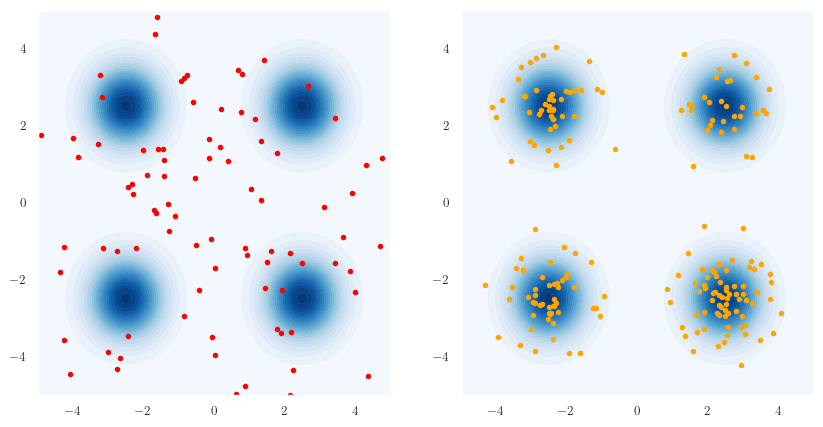

In [196]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

n_vi = 100


ax[0].contourf(X1_grid, X2_grid, y_grid, cmap="Blues", levels=20)
ax[0].scatter(w_vi[:n_vi, 0], w_vi[:n_vi, 1], s=10, label="VI", color="red")
ax[1].contourf(X1_grid, X2_grid, y_grid, cmap="Blues", levels=20)
ax[1].scatter(w_svgd[:, 0], w_svgd[:, 1], s=10, label="SVGD", color="orange")
ax[0].set_xlim(lb,  ub)
ax[0].set_ylim(lb,  ub)

## M-SRFR Predictions

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from steinRF.gp.models import build_train_mix_rff

In [232]:
airfoil = pd.read_csv("../airfoil/airfoil.csv")
X_scaler = MinMaxScaler()
y_scaler = StandardScaler()
airfoil[
    ['frequency', 'angle', 'chord_length', 'velocity', 'thickness']
] = X_scaler.fit_transform(airfoil.drop(columns=["sound_pressure"]))
airfoil['sound_pressure'] = y_scaler.fit_transform(airfoil[['sound_pressure']])
# airfoil = pd.DataFrame(scaler.fit_transform(airfoil))
# airfoil.columns = ['frequency', 'angle', 'chord_length', 'velocity', 'thickness', 'sound_pressure']

X = jnp.array(airfoil.drop(columns=['sound_pressure']))
y = jnp.array(airfoil['sound_pressure'])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=int(key[0]))
X_train, X_val, y_train, y_val = jnp.array(X_train), jnp.array(X_val), jnp.array(y_train), jnp.array(y_val)
d = X_train.shape[1]

In [233]:
mix_params = {
        'diag': 0.004082285639051628, 'lr': 0.14002311333326806, 'lr_gd': 0.29379290342643566, 'alpha': 1.6, 'q': 6, 's': 2,
        'epochs': 1000, 'from_data': False, 'gd_params': lambda t: [t.kernel.transform.scale], 'init_ls': True,
        'prior': TFTarget(tfd.Normal(jnp.zeros(d), jnp.ones(d) * 3))
}

mix_rff, _ = build_train_mix_rff(jax.random.PRNGKey(0), X_train, y_train, R=100, **mix_params)

In [234]:
mix_rff_preds = mix_rff.multi_condition(y_train, X_val, diag=mix_params["diag"])[0]
mix_rff_mu = jnp.mean(mix_rff_preds, axis=0)
mix_rff_std = jnp.std(mix_rff_preds, axis=0)

<Axes: ylabel='Density'>

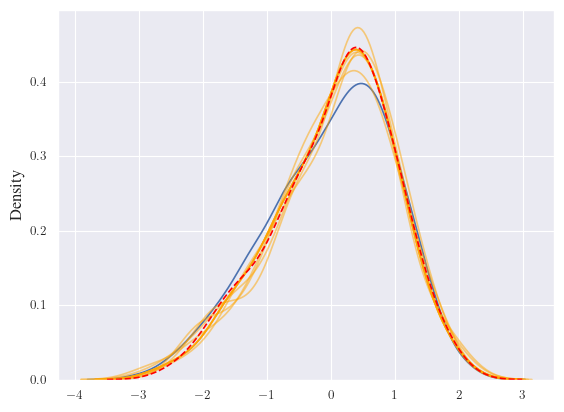

In [235]:
sns.kdeplot(y)

for i in range(10):
    sns.kdeplot(mix_rff_preds[i], alpha=0.5, color="orange")

sns.kdeplot(mix_rff_mu, color="red", linestyle="--")